# Project 2
This is project 2. I did stuff.

In [5]:
import numpy as np
import pydotplus
import pprint as pp
import mlrose
import pandas as pd
import random
import datetime

In [2]:
# load local files
%run util/util
%run util/stats
%run util/charts

In [3]:
max_trials = 10
rand_seeds = random.sample(range(1, 999999999), max_trials)

In [4]:
def print_groups(g):
    for key, item in g:
        print(g.get_group(key), "\n\n")

In [6]:
def show_aggregates(attempts):
    att_group = attempts.groupby('max-attemtps')
    fitness_agg = att_group['best-fit-score'].agg([np.mean, np.std, np.median, np.min, np.max])
    fitness_agg.columns = ['Fitness Mean', 'Fitness Std.', 'Fitness Median', 'Fitness Min', 'Fitness Max']
    time_agg = att_group['time'].agg([np.mean])
    time_agg.columns = ['Time Mean']
    data_agg_comb = pd.concat([fitness_agg, time_agg], axis=1, sort=False)
    return data_agg_comb

In [7]:
def try_problem(prob_f, attempt_max):
    attempts = []
    for a in range(1, attempt_max + 1):
        for t in range(len(rand_seeds)):
            seed = rand_seeds[t]
            start_time = datetime.datetime.now()
            best_state, best_fit_score = prob_f(a, seed)
            total_delta = datetime.datetime.now() - start_time
            microseconds  = total_delta.seconds * 1000000 + total_delta.microseconds
            attempts.append([a, t, best_state, best_fit_score, seed, microseconds])
    df = pd.DataFrame(attempts, columns=['max-attemtps', 'trial-n', 'best-state', 'best-fit-score', 'seed', 'time'])
    
    return df

In [8]:
def try_sim_ann(prob, initial_state, attempt_max):
    def p(attempts, seed):
        return mlrose.simulated_annealing(prob, schedule = mlrose.ExpDecay(), max_attempts = attempts, 
                                                              max_iters = 1000, init_state = initial_state, 
                                                              random_state = seed)
    return try_problem(p, attempt_max)

In [9]:
def try_genetic(prob, attempt_max):
    def p(attempts, seed):
        return mlrose.genetic_alg(prob, max_attempts=attempts, random_state=seed)
    return try_problem(p, attempt_max)

In [10]:
def try_rand_hill(prob, initial_state, attempt_max):
    def p(attempts, seed):
        return mlrose.random_hill_climb(prob, max_attempts=attempts, random_state=seed)
    return try_problem(p, attempt_max)

In [11]:
def try_mimic(prob, attempt_max):
    def p(attempts, seed):
        return mlrose.mimic(prob, max_attempts=attempts, random_state=seed)
    return try_problem(p, attempt_max)

In [29]:
def show_learning_rate(data, title, ylim=None, xlim=None):
    plt.plot(data['Fitness Mean'], 'b', data['Fitness Median'], 'r')
    plt.legend(['Mean Fitness', 'Median Fitness'], loc='lower right')
    plt.xlabel('iterations')
    plt.ylabel('fitness')
    if ylim is not None:
        plt.ylim(ylim[0],ylim[1])
    if xlim is not None:
        plt.xlim(xlim[0],xlim[1])
    plt.title(title)
    plt.show()

In [30]:
def show_learning_time(data, title):
    plt.plot(data['Time Mean'], 'gray')
    plt.legend(['Time Mean'], loc='lower right')
    plt.xlabel('iterations')
    plt.ylabel('time')
    plt.title(title)
    plt.show()

In [14]:
def show_charts(data, title):
    show_learning_rate(data, title, ylim=[0,90])
    show_learning_time(data, title + ' Time')

# Sum Odds
Six peaks problem.

In [15]:
def sum_odds_fitness_fn(a):
    # returns the count of ones
    a = np.array(a)
    return sum(a[np.where(a % 2 == 1)])

In [16]:
sum_odds_fitness = mlrose.CustomFitness(sum_odds_fitness_fn)
sum_odds_problem = mlrose.DiscreteOpt(length = 10, fitness_fn = sum_odds_fitness, maximize = True, max_val = 10)

In [17]:
sum_odds_sim_ann = try_sim_ann(sum_odds_problem, [0] * 10, 100)

In [18]:
sum_odds_sim_ann_agg = show_aggregates(sum_odds_sim_ann)
sum_odds_sim_ann_agg

,Fitness Mean,Fitness Std.,Fitness Median,Fitness Min,Fitness Max,Time Mean
max-attemtps,,,,,,
1,15.9,8.265726,14.5,8.0,36.0,270.5
2,32.9,10.268073,37.5,17.0,49.0,550.8
3,49.0,11.537379,51.5,28.0,64.0,797.2
4,57.3,7.986795,55.5,49.0,72.0,1070.3
5,57.3,7.986795,55.5,49.0,72.0,886.6
...,...,...,...,...,...,...
96,89.6,0.843274,90.0,88.0,90.0,5872.9
97,89.6,0.843274,90.0,88.0,90.0,5944.6
98,89.6,0.843274,90.0,88.0,90.0,5805.8


In [19]:
sum_odds_sim_ann

,max-attemtps,trial-n,best-state,best-fit-score,seed,time
0,1,0,"[0, 4, 0, 0, 0, 2, 5, 0, 3, 6]",8.0,353351277,555
1,1,1,"[5, 0, 1, 0, 3, 6, 6, 0, 0, 9]",18.0,243834150,383
2,1,2,"[8, 0, 0, 0, 9, 9, 0, 0, 0, 0]",18.0,453828290,155
3,1,3,"[3, 0, 0, 9, 0, 0, 0, 0, 0, 0]",12.0,864648086,112
4,1,4,"[3, 5, 0, 0, 9, 5, 7, 6, 7, 2]",36.0,530946998,409
...,...,...,...,...,...,...
995,100,5,"[9, 9, 9, 9, 9, 9, 9, 9, 7, 9]",88.0,969811007,5086
996,100,6,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]",90.0,473738812,5659
997,100,7,"[9, 9, 9, 9, 9, 9, 9, 7, 9, 9]",88.0,766904090,4641
998,100,8,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]",90.0,840342714,4947


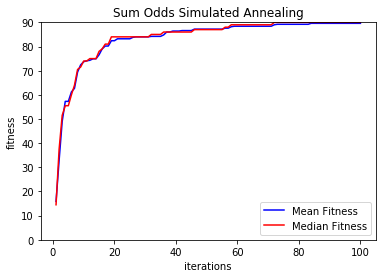

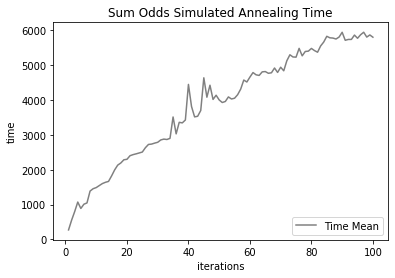

In [31]:
show_charts(sum_odds_sim_ann_agg, 'Sum Odds Simulated Annealing')

In [32]:
sum_odds_genetic = try_genetic(sum_odds_problem, 100)

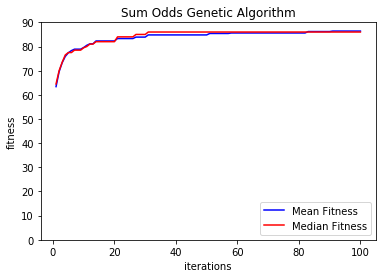

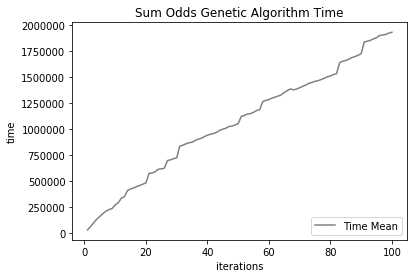

In [33]:
sum_odds_genetic_agg = show_aggregates(sum_odds_genetic)
show_charts(sum_odds_genetic_agg, 'Sum Odds Genetic Algorithm')

It makes sense that fewer iterations show that the genetic algorithms starts with a higher sum of odd numbers where the array of numbers is automatically generated than simulated anneling where the initial array is only of zeros.

In [37]:
sum_odds_genetic.iloc[range(990, 1000)]

,max-attemtps,trial-n,best-state,best-fit-score,seed,time
990,100,0,"[9, 9, 9, 9, 9, 9, 5, 9, 9, 9]",86.0,353351277,2216575
991,100,1,"[9, 9, 7, 9, 9, 9, 9, 9, 9, 9]",88.0,243834150,2181773
992,100,2,"[9, 7, 9, 9, 9, 9, 9, 9, 9, 9]",88.0,453828290,1968660
993,100,3,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]",90.0,864648086,2093507
994,100,4,"[7, 9, 7, 9, 9, 9, 9, 9, 9, 5]",82.0,530946998,1283510
995,100,5,"[9, 9, 9, 7, 7, 9, 9, 9, 9, 9]",86.0,969811007,1910327
996,100,6,"[7, 9, 9, 9, 9, 9, 9, 9, 5, 9]",84.0,473738812,1279793
997,100,7,"[9, 7, 7, 9, 9, 9, 9, 9, 9, 9]",86.0,766904090,1344927
998,100,8,"[9, 9, 9, 9, 9, 9, 7, 9, 9, 9]",88.0,840342714,3130667
999,100,9,"[7, 9, 7, 9, 9, 9, 9, 9, 9, 9]",86.0,780748506,1937635


In [23]:
sum_odds_rand_hill = try_rand_hill(sum_odds_problem, [0] * 10, 100)

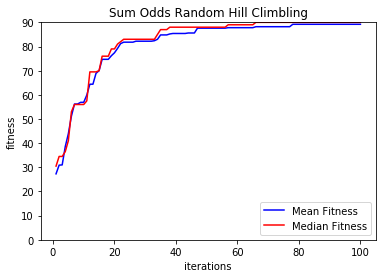

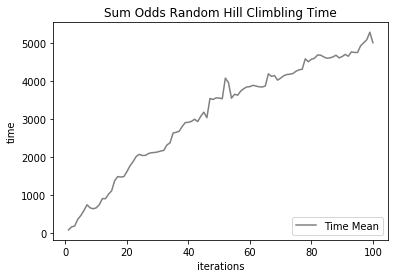

In [34]:
sum_odds_rand_hill_agg = show_aggregates(sum_odds_rand_hill)
show_charts(sum_odds_rand_hill_agg, 'Sum Odds Random Hill Climbling')

In [25]:
sum_odds_mimic = try_mimic(sum_odds_problem, 100)

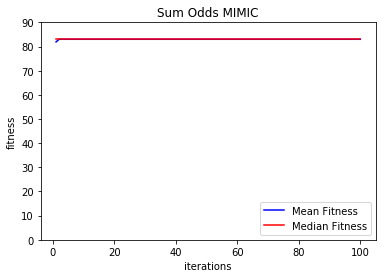

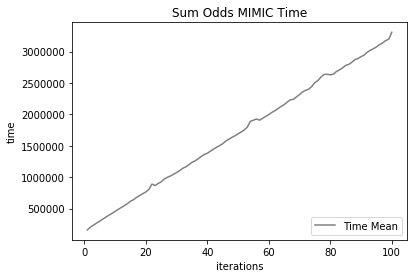

In [39]:
sum_odds_mimic_agg = show_aggregates(sum_odds_mimic)
show_charts(sum_odds_mimic_agg, 'Sum Odds MIMIC')

In [38]:
sum_odds_mimic_agg.iloc[range(90,100)]

,Fitness Mean,Fitness Std.,Fitness Median,Fitness Min,Fitness Max,Time Mean
max-attemtps,,,,,,
91,83.0,2.867442,83.0,78.0,88.0,2944272.4
92,83.0,2.867442,83.0,78.0,88.0,2990188.5
93,83.0,2.867442,83.0,78.0,88.0,3020880.0
94,83.0,2.867442,83.0,78.0,88.0,3046267.7
95,83.0,2.867442,83.0,78.0,88.0,3074075.3
96,83.0,2.867442,83.0,78.0,88.0,3110935.2
97,83.0,2.867442,83.0,78.0,88.0,3137533.9
98,83.0,2.867442,83.0,78.0,88.0,3175028.5
99,83.0,2.867442,83.0,78.0,88.0,3196644.8
